In [2]:
import numpy as np

from mvpa2.datasets.base import Dataset
from mvpa2.algorithms.hyperalignment import Hyperalignment

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
# Define a function to create a random 3D rotation matrix
def rand_rotation():
    x_rotation = np.random.uniform(0,2*np.pi,1)
    Rx = [[1, 0, 0], 
          [0, np.cos(x_rotation), -np.sin(x_rotation)],
          [0, np.sin(x_rotation), np.cos(x_rotation)]]

    y_rotation = np.random.uniform(0,2*np.pi,1)
    Ry = [[np.cos(y_rotation), 0, np.sin(y_rotation)], 
          [0, 1, 0],
          [-np.sin(y_rotation), 0, np.cos(y_rotation)]]

    z_rotation = np.random.uniform(0,2*np.pi,1)
    Rz = [[np.cos(z_rotation), -np.sin(z_rotation), 0], 
          [np.sin(z_rotation), np.cos(z_rotation), 0],
          [0, 0, 1]]
    
    return np.dot(np.dot(Rx,Ry),Rz)

In [34]:
# Create fake rotated data
D = np.random.uniform(0,1,[10,3])
datasets = [Dataset(D)]
rotations = [np.identity(3)]
for i in range(5):
    R = rand_rotation()
    rotations.append(R)
    datasets.append(Dataset(np.dot(D,R)))

In [35]:
# Initialize a hyperalingment object
hyper_aligner = Hyperalignment()

In [36]:
# Train our hyperalingment model
hyper_aligner.train(datasets)

In [37]:
# Collect our mappings from fitting hyperalignment
mappers = hyper_aligner(datasets)

In [38]:
# Apply the hyper-alignment projection to transform the data
new_datasets = []
for dataset, mapper in zip(datasets, mappers):
    new_datasets.append(mapper.forward(dataset))
    
# Note: this above is equivalent to the following one liner
new_datasets = [mapper.forward(dataset) for dataset, mapper in zip(datasets, mappers)]

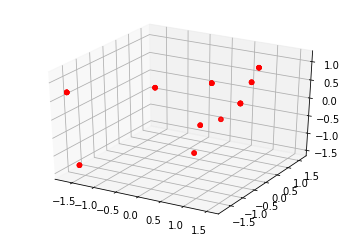

In [39]:
# Plot the hyperaligned data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(new_datasets)):
    ha_data = new_datasets[i]
    ax.scatter(ha_data.samples[:,0],ha_data.samples[:,1],ha_data.samples[:,2],c='r')

In [44]:
# Just to convince yourself it worked, look at the difference between final mappings for two randomly chosen sets
ex1 = new_datasets[3]
ex2 = new_datasets[5]
print ex1.samples - ex2.samples

[[-1.33226763e-15 -1.11022302e-15 -3.33066907e-16]
 [ 2.22044605e-16 -1.11022302e-15  2.22044605e-16]
 [-2.22044605e-16 -6.24500451e-16 -1.11022302e-16]
 [-3.33066907e-16 -1.33226763e-15 -5.55111512e-16]
 [ 2.63677968e-16 -2.22044605e-16  1.11022302e-16]
 [-4.16333634e-16 -1.11022302e-16  2.22044605e-16]
 [-1.11022302e-15  0.00000000e+00  2.22044605e-16]
 [ 2.22044605e-16 -4.44089210e-16 -4.44089210e-16]
 [-2.49800181e-16 -3.33066907e-16  3.33066907e-16]
 [-3.33066907e-16 -1.19348975e-15 -1.66533454e-16]]


In [175]:
# From here: try classification between subjects, in aligned space